In [1]:
import click

from qstrader import settings
from qstrader.compat import queue

from qstrader.price_parser import PriceParser
from qstrader.price_handler.yahoo_daily_csv_bar import YahooDailyCsvBarPriceHandler

from qstrader.strategy.buy_and_hold import BuyAndHoldStrategy
from qstrader.strategy import Strategies, DisplayStrategy

from qstrader.position_sizer.fixed import FixedPositionSizer
from qstrader.risk_manager.example import ExampleRiskManager
from qstrader.portfolio_handler import PortfolioHandler
from qstrader.compliance.example import ExampleCompliance
from qstrader.execution_handler.ib_simulated import IBSimulatedExecutionHandler
from qstrader.statistics.simple import SimpleStatistics
from qstrader.trading_session.backtest import Backtest

In [13]:
tickers = 'SP500TR' 
tickers = tickers.split(",")
config = settings.DEFAULT_CONFIG_FILENAME
testing = False
filename = 'My_First_output'

config = settings.from_file(config, testing)
#run(config, testing, tickers, filename)

In [14]:
events_queue = queue.Queue()
csv_dir = config.CSV_DATA_DIR
print(csv_dir)
initial_equity = PriceParser.parse(500000.00)

/Users/robincole/Documents/qstrader/data


In [15]:
# Use Yahoo Daily Price Handler
price_handler = YahooDailyCsvBarPriceHandler(csv_dir, events_queue, tickers)

    # Use the Buy and Hold Strategy
strategy = BuyAndHoldStrategy(tickers, events_queue)
strategy = Strategies(strategy, DisplayStrategy())

    # Use an example Position Sizer
position_sizer = FixedPositionSizer()

    # Use an example Risk Manager
risk_manager = ExampleRiskManager()

    # Use the default Portfolio Handler
portfolio_handler = PortfolioHandler(initial_equity, events_queue, price_handler, position_sizer, risk_manager)

    # Use the ExampleCompliance component
compliance = ExampleCompliance(config)

    # Use a simulated IB Execution Handler
execution_handler = IBSimulatedExecutionHandler(events_queue, price_handler, compliance)

    # Use the default Statistics
statistics = SimpleStatistics(config, portfolio_handler)

Running Backtest...
0 Type: EventType.BAR, Ticker: SP500TR, Time: 2010-01-04 00:00:00, Period: 1day, Open: 1116.56, High: 1133.87, Low: 1116.56, Close: 1132.99, Adj Close: 1132.99, Volume: 3991400000
1 Type: EventType.BAR, Ticker: SP500TR, Time: 2010-01-05 00:00:00, Period: 1day, Open: 1132.66, High: 1136.63, Low: 1129.66, Close: 1136.52, Adj Close: 1136.52, Volume: 2491020000
2 Type: EventType.BAR, Ticker: SP500TR, Time: 2010-01-06 00:00:00, Period: 1day, Open: 1135.71, High: 1139.19, Low: 1133.95, Close: 1137.14, Adj Close: 1137.14, Volume: 4972660000
3 Type: EventType.BAR, Ticker: SP500TR, Time: 2010-01-07 00:00:00, Period: 1day, Open: 1136.27, High: 1142.46, Low: 1131.32, Close: 1141.69, Adj Close: 1141.69, Volume: 5270680000
4 Type: EventType.BAR, Ticker: SP500TR, Time: 2010-01-08 00:00:00, Period: 1day, Open: 1140.52, High: 1145.39, Low: 1136.22, Close: 1144.98, Adj Close: 1144.98, Volume: 4389590000
100 BARS processed @ 73.683391 BARS/s

100 Type: EventType.BAR, Ticker: SP500TR,

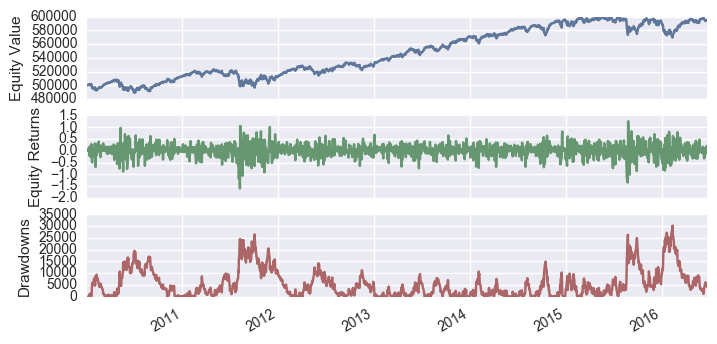

Save results to 'My_First_output'


In [16]:
backtest = Backtest(price_handler, strategy, portfolio_handler, execution_handler, position_sizer, risk_manager, statistics, initial_equity)

results = backtest.simulate_trading(testing=testing)
#statistics.save(filename)

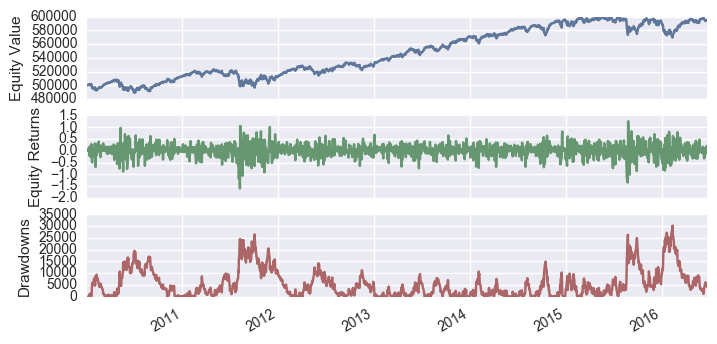

In [17]:
statistics.plot_results()

In [34]:
stats = statistics.get_results()  # returns a dict
stats.keys()

dict_keys(['drawdowns', 'max_drawdown', 'sharpe', 'equity_returns', 'max_drawdown_pct', 'equity'])

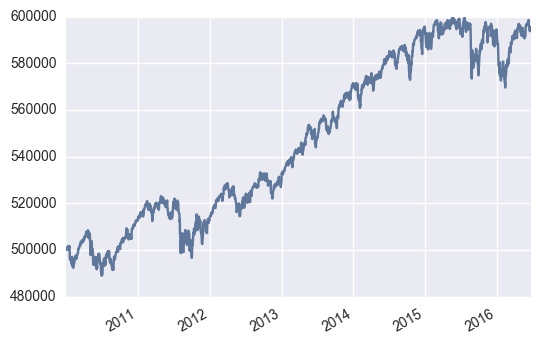

In [45]:
stats['equity'].plot()

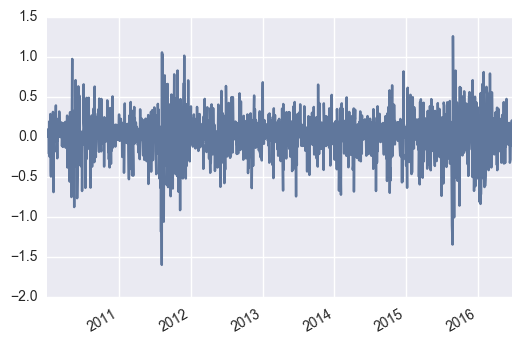

In [40]:
stats['equity_returns'].plot()

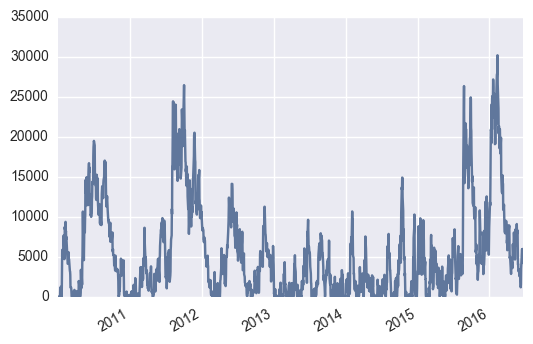

In [44]:
stats['drawdowns'].plot()

In [37]:
stats['max_drawdown']

30174.010000000009

In [46]:
stats['max_drawdown_pct']

5.0308000000000002

In [38]:
stats['sharpe']

0.5968